# <center>Titanic Survival Prediction 🚢</center>

<img src="https://images.unsplash.com/photo-1558431571-4a9f128e135f?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1032&q=80">

# About the Dataset

* **Survived** - Survival (0 = No, 1 = Yes) ---> *Output Variable*
* **Pclass** - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) ---> *Input Variable*
* **Sex** - Sex of the passenger ---> *Input Variable*
* **Age** - Age in years ---> Input Variable
* **Sibsp** - number of siblings/spouses aboard the Titanic ---> *Input Variable*
* **Parch** - number of parents/children aboard the Titanic ---> *Input Variable*
* **Ticket** - Ticket number ---> *Input Variable*
* **Fare** - Passenger fare ---> *Input Variable*
* **Cabin** - Cabin number ---> *Input Variable*
* **Embarked** - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) ---> *Input Variable*

# Importing the Essential Libraries, Metrics, Tools and Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Loading the Data

In [2]:
df = pd.read_csv("../input/titanic/train.csv")

# Exploratory Data Analysis

***Taking a look at the first 5 rows of the dataset.***

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***Checking the shape—i.e. size—of the data.***

In [4]:
df.shape

(891, 12)

***Learning the dtypes of columns' and how many non-null values there are in those columns.***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***Getting the statistical summary of dataset.***

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

# Detecting Missing Values and Duplicates

In [8]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

***It seems that we have some missing values in our data. We have to drop the "Cabin" column because there are a lot of missing values to fix. As for other columns, we are imputing the missing values in categorical columns with mode of that particular column and missing values in numerical columns with median value of that column.***

In [9]:
df.drop("Cabin", axis=1, inplace=True)

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode().values[0], inplace=True)

In [10]:
df.duplicated().sum()

116

In [11]:
df.drop_duplicates(inplace=True)

# Data Visualization

***Visualizing the Correlation between the numerical variables using pairplot visualization.***

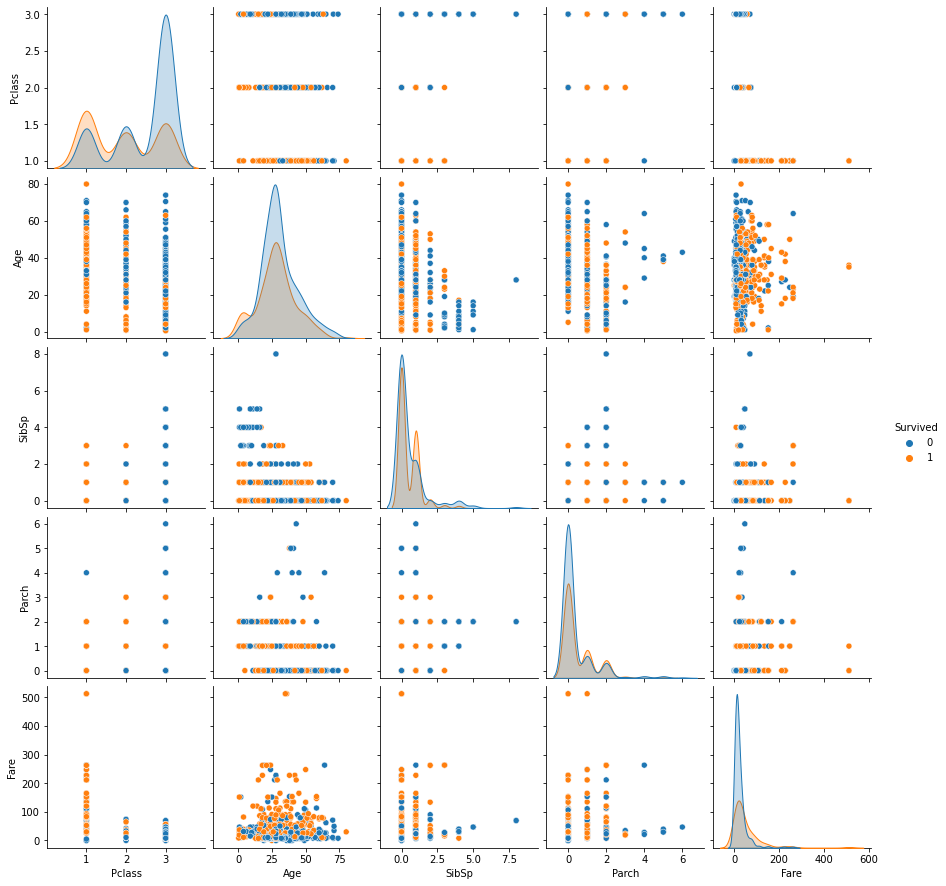

In [12]:
sns.pairplot(df, hue="Survived")

<h3>Plotting the Values of Each Variable</h3>

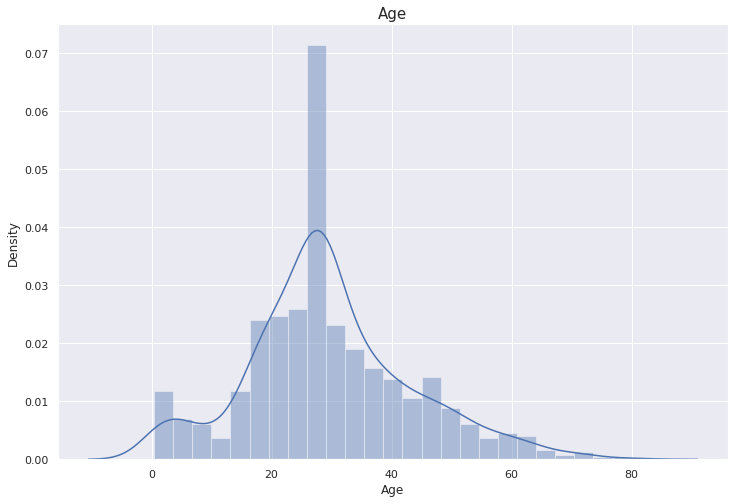

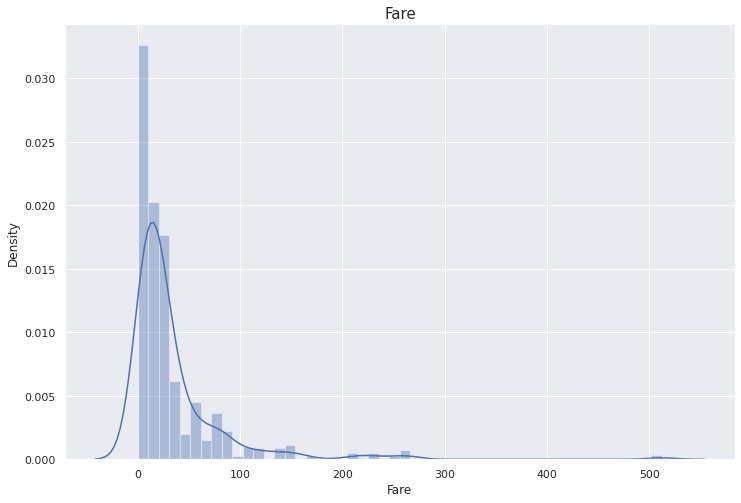

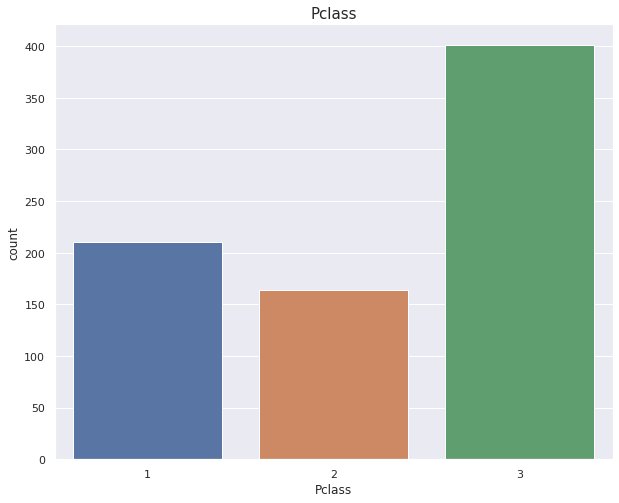

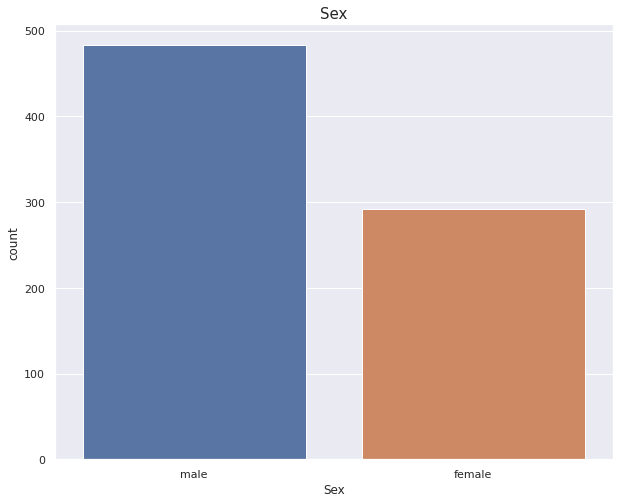

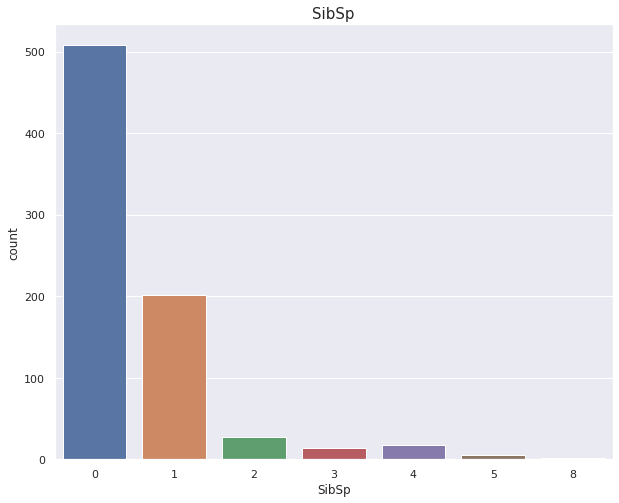

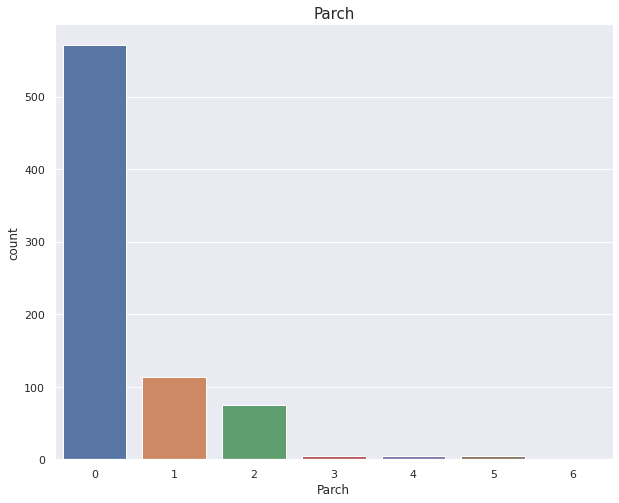

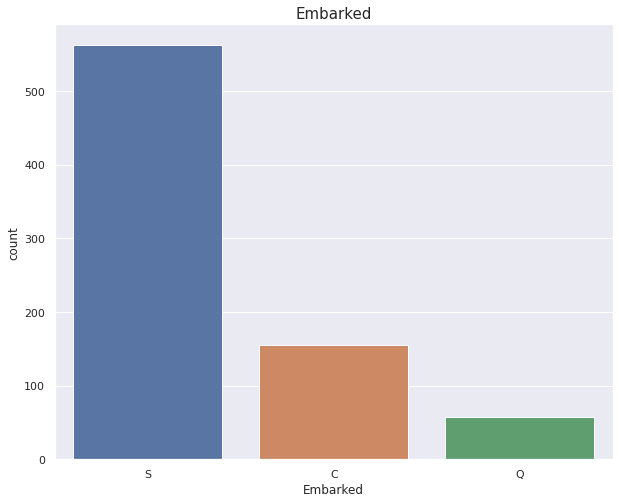

In [13]:
num_cols_viz = ["Age", "Fare"]
cat_cols_viz = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

sns.set()

for num_col in num_cols_viz:
    plt.figure(figsize=(12,8))
    sns.distplot(df[num_col])
    plt.title(f"{num_col}", size=15)
    plt.show()

for cat_col in cat_cols_viz:
    plt.figure(figsize=(10,8))
    sns.countplot(df[cat_col])
    plt.title(f"{cat_col}", size=15)
    plt.show()

<h3>Relationship Between Each Variable and Target Variable (Survived)</h3>

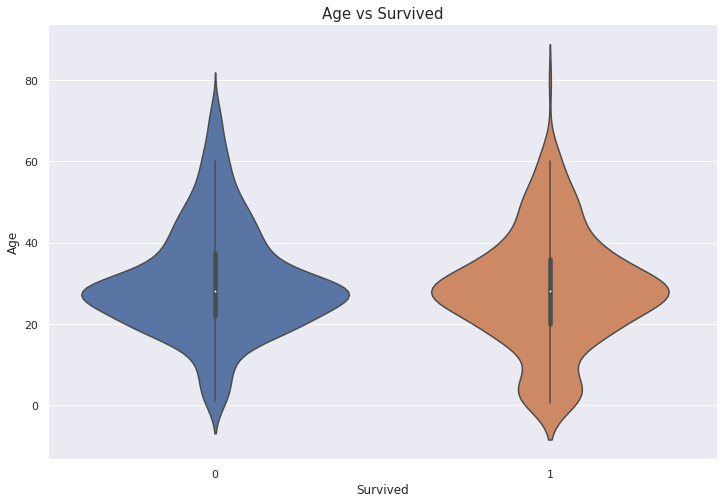

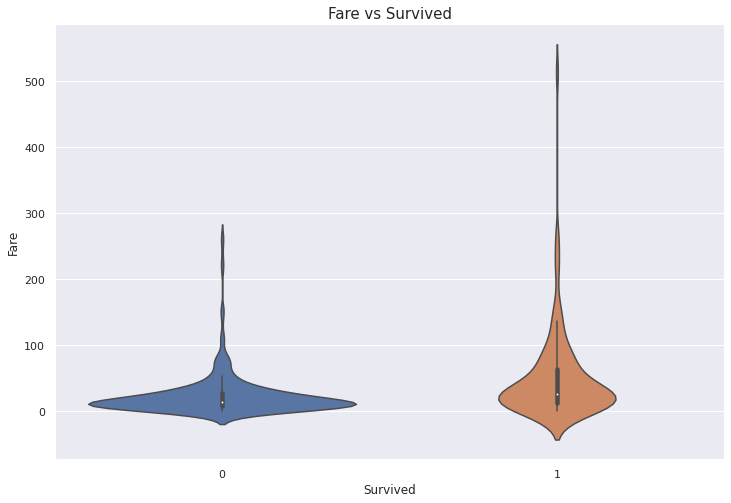

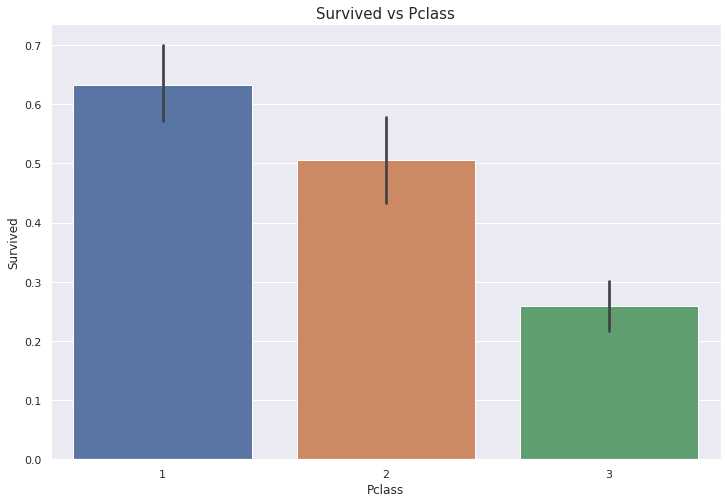

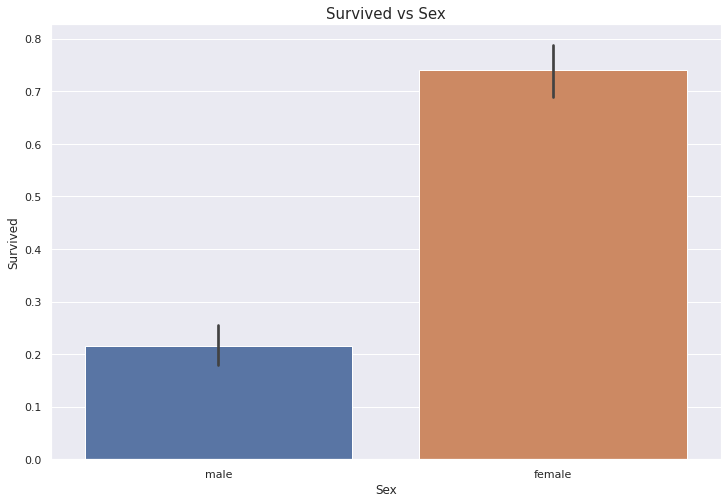

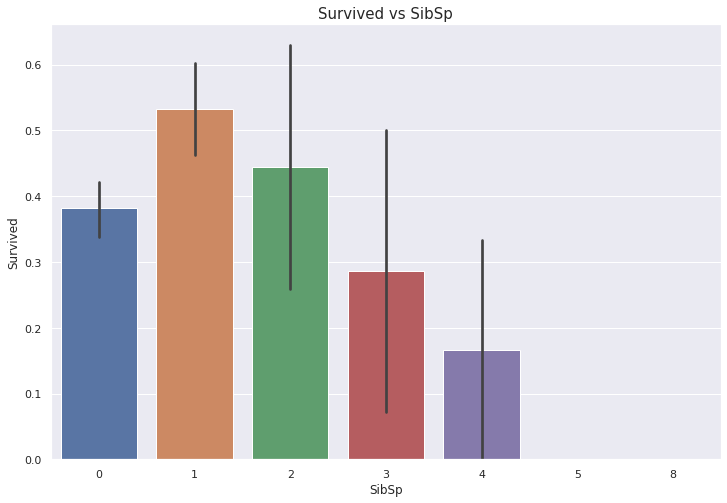

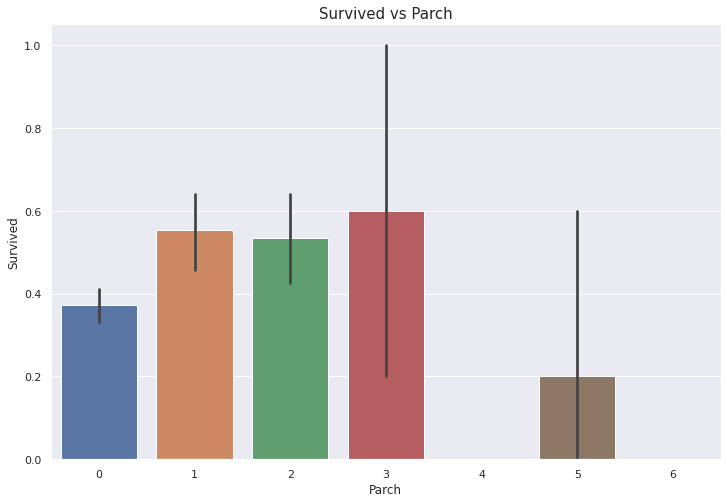

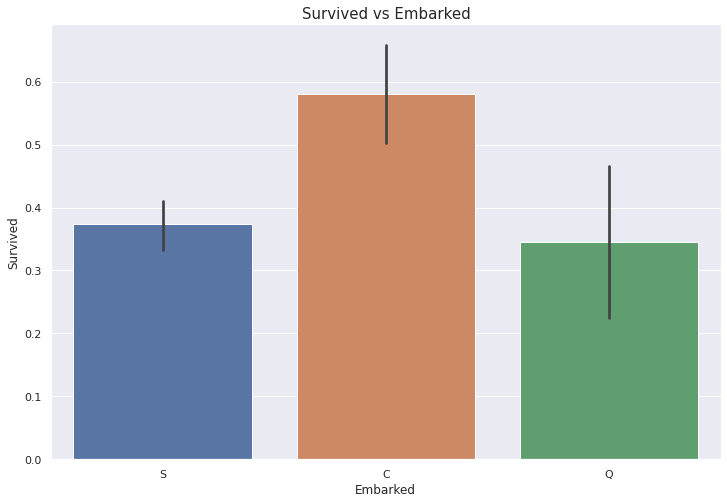

In [14]:
for num_col in num_cols_viz:
    plt.figure(figsize=(12,8))
    sns.violinplot(x=df["Survived"], y=df[num_col])
    plt.title(f"{num_col} vs Survived", size=15)
    plt.show()

for cat_col in cat_cols_viz:
    plt.figure(figsize=(12,8))
    sns.barplot(x=df[cat_col], y=df["Survived"])
    plt.title(f"Survived vs {cat_col}", size=15)
    plt.show()

***Visualizing the linear correlations between variables using Heatmap visualization. The measure used for finding the linear correlation between each variable is Pearson Correlation Coefficient.***

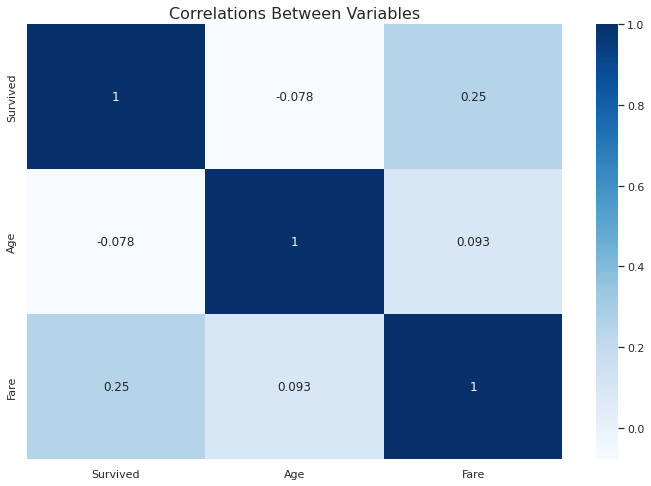

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df[["Survived", "Age", "Fare"]].corr(), annot=True, cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

# Data Preprocessing

<h3>X, y Split</h3>

In [16]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

<h3>One-Hot Encoding</h3>

In [17]:
X = pd.get_dummies(X, columns=["Embarked", "Sex"])

<h3>Data Standardization</h3>

In [18]:
scaler = StandardScaler()
X[["Age", "Fare"]] = scaler.fit_transform(X[["Age", "Fare"]])

<h3>Train-Test Split</h3>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Machine Learning Models

In [20]:
models = pd.DataFrame(columns=["Model", "Accuracy Score"])

<h3>Logistic Regression</h3>

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "LogisticRegression", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

Accuracy Score: 0.776824034334764


<h3>Random Forest Classifier</h3>

In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "RandomForestClassifier", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

Accuracy Score: 0.759656652360515


<h3>Gradient Boosting Classifier</h3>

In [23]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "GradientBoostingClassifier", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

Accuracy Score: 0.7854077253218884


<h3>Support Vector Machines</h3>

In [24]:
svc = SVC()
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "SVC", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

Accuracy Score: 0.8326180257510729


<h3>K-Nearest Neighbors</h3>

In [25]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "KNeighborsClassifier", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

Accuracy Score: 0.7553648068669528


<h3>Model Comparison Before Hyperparameter Tuning</h3>

In [26]:
models.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
3,SVC,0.832618
2,GradientBoostingClassifier,0.785408
0,LogisticRegression,0.776824
1,RandomForestClassifier,0.759657
4,KNeighborsClassifier,0.755365


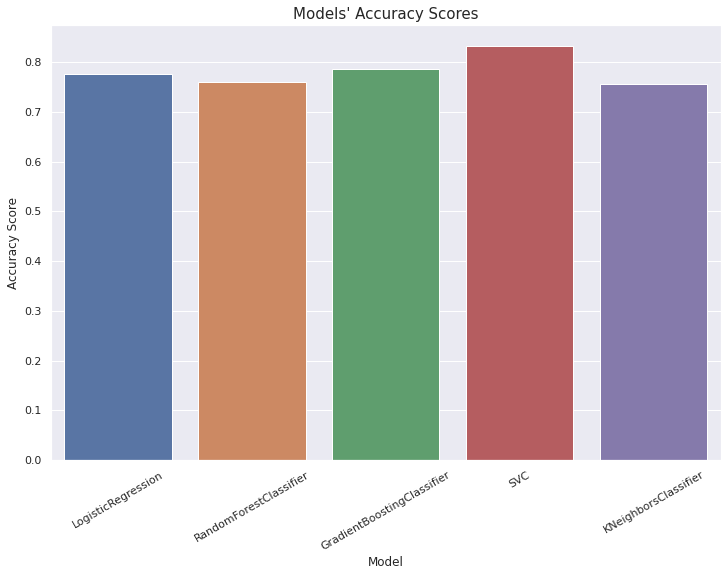

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["Accuracy Score"])
plt.title("Models' Accuracy Scores", size=15)
plt.xticks(rotation=30)
plt.show()

# Hyperparameter Tuning

***Defining a couple of visualization functions for the convenience of evaluation***

In [28]:
def visualize_roc_auc_curve(model, model_name):
    pred_prob = model.predict_proba(X_test)
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)  # tpr = fpr

    score = roc_auc_score(y_test, pred_prob[:,1])
    print("ROC AUC Score:", score)

    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, linestyle='--',color='orange')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

    plt.title(f'{model_name} ROC curve', size=15)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.show()

In [29]:
def f_importances(model, model_name):
    f_imp = pd.DataFrame({"Feature Importances": model.feature_importances_}, index=X.columns)

    plt.figure(figsize=(12,8))
    sns.barplot(x=f_imp["Feature Importances"], y=f_imp.index)
    plt.title(f"{model_name} Feature Importances", size=15)
    plt.show()

In [30]:
tuned_models = pd.DataFrame(columns=["Model", "Accuracy Score"])

<h3>Tuning the Logistic Regression</h3>

In [31]:
param_grid_log_reg = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, cv=5, scoring="accuracy", verbose=0, n_jobs=-1)

grid_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [32]:
log_reg_params = grid_log_reg.best_params_

log_reg = LogisticRegression(**log_reg_params)
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "LogisticRegression", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.776824034334764


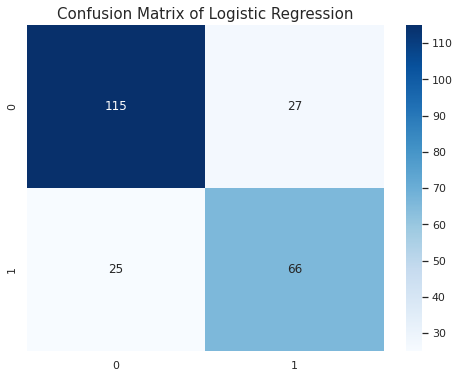

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of Logistic Regression", size=15)
plt.show()

ROC AUC Score: 0.8439483052159109


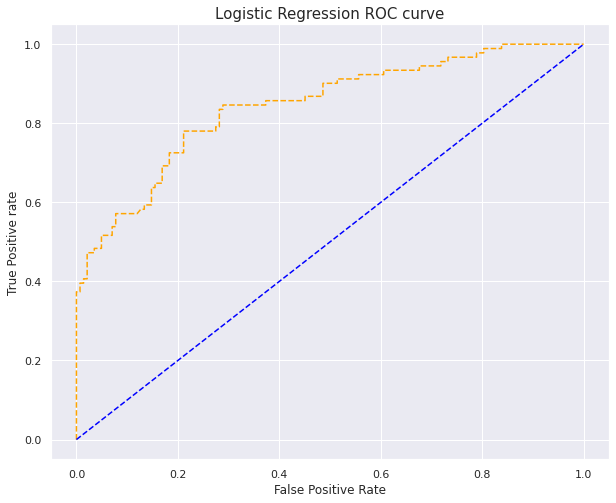

In [34]:
visualize_roc_auc_curve(log_reg, "Logistic Regression")

<h3>Tuning the Random Forest</h3>

In [35]:
param_grid_rfc = {"max_depth": [None],
                  "max_features": [1, 3, 10],
                  "min_samples_split": [2, 3, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "n_estimators" :[100, 200, 500]}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, cv=5, scoring="accuracy", verbose=0, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [36]:
rfc_params = grid_rfc.best_params_

rfc = RandomForestClassifier(**rfc_params)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "RandomForestClassifier", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.7639484978540773


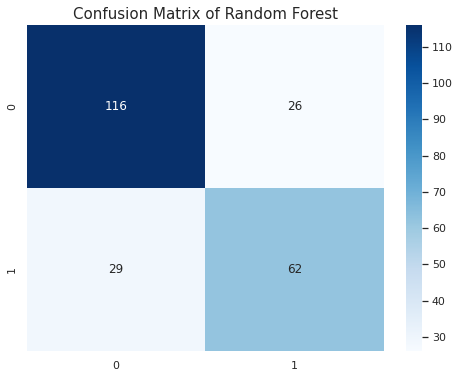

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of Random Forest", size=15)
plt.show()

ROC AUC Score: 0.8301346540783161


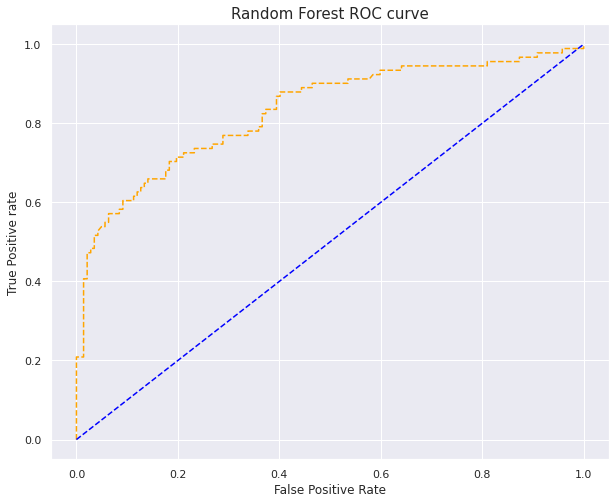

In [38]:
visualize_roc_auc_curve(rfc, "Random Forest")

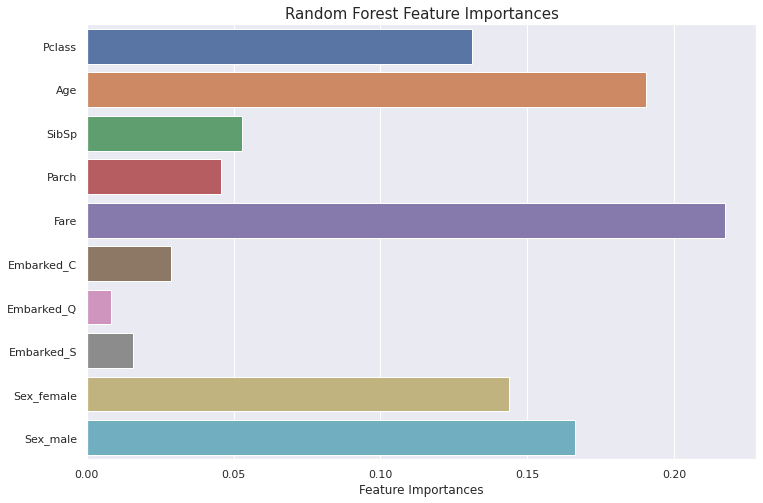

In [39]:
f_importances(rfc, "Random Forest")

<h3>Tuning the Gradient Boosting Classifier</h3>

In [40]:
param_grid_gbc = {'n_estimators' : [100, 200, 500],
                  'learning_rate': [0.1, 0.05, 0.01],
                  'max_depth': [2, 3, 6],
                  'min_samples_leaf': [1, 2, 5]}

grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid_gbc, cv=5, scoring="accuracy", verbose=0, n_jobs=-1)

grid_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [2, 3, 6], 'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [41]:
gbc_params = grid_gbc.best_params_

gbc = GradientBoostingClassifier(**gbc_params)
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "GradientBoostingClassifier", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.7811158798283262


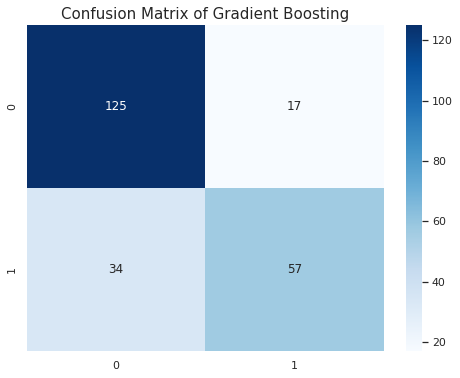

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of Gradient Boosting", size=15)
plt.show()

ROC AUC Score: 0.8470051075684879


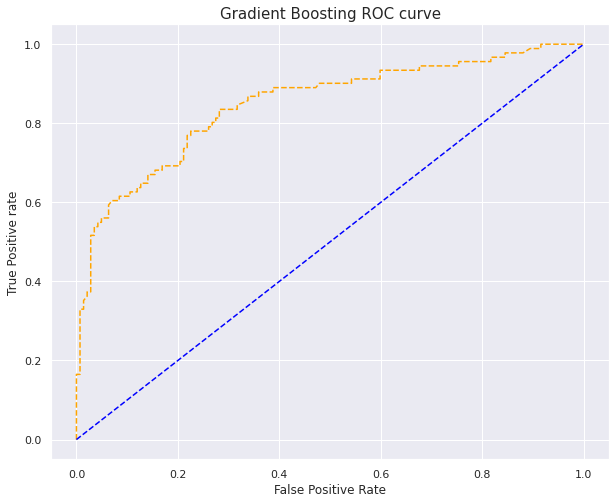

In [43]:
visualize_roc_auc_curve(gbc, "Gradient Boosting")

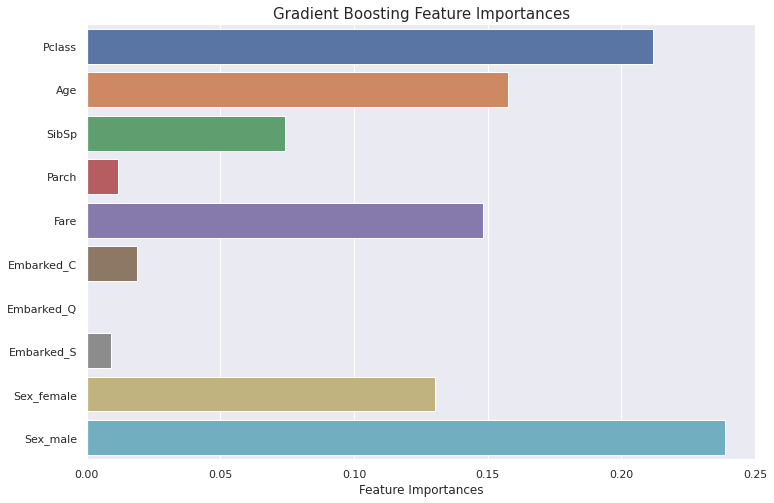

In [44]:
f_importances(gbc, "Gradient Boosting")

<h3>Tuning the Support Vector Machines</h3>

In [45]:
param_grid_svc = {'gamma': [ 0.001, 0.01, 0.1, 1, 10],
                  'C': [1, 10, 50, 100, 200, 300, 500, 1000]}

grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring="accuracy", verbose=0, n_jobs=-1)

grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 500, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [46]:
svc_params = grid_svc.best_params_

svc = SVC(**svc_params)
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "SVC", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.8326180257510729


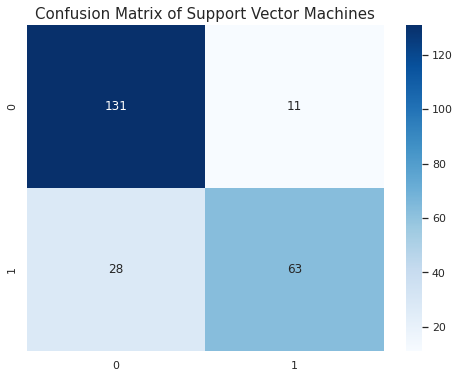

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of Support Vector Machines", size=15)
plt.show()

***If we take a look at the official technical documentation of SVC, we can observe that predict_proba() function may be inconsistent with predict() function. It sucks especially on the small datasets, that's why we don't plot ROC AUC Curve for SVC model.***

<h3>Tuning the K-Nearest Neighbors</h3>

In [48]:
param_grid_knn = {"n_neighbors": range(1,20),
                  "leaf_size": range(1,50, 5),
                  "p": [1, 2]}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring="accuracy", verbose=0, n_jobs=-1)

grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(1, 50, 5),
                         'n_neighbors': range(1, 20), 'p': [1, 2]},
             scoring='accuracy')

In [49]:
knn_params = grid_knn.best_params_

knn = KNeighborsClassifier(**knn_params)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "KNeighborsClassifier", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.7811158798283262


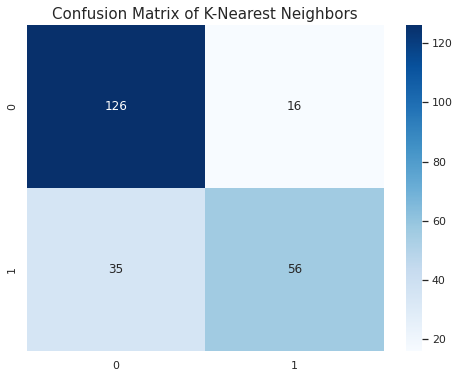

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of K-Nearest Neighbors", size=15)
plt.show()

ROC AUC Score: 0.8384151060207398


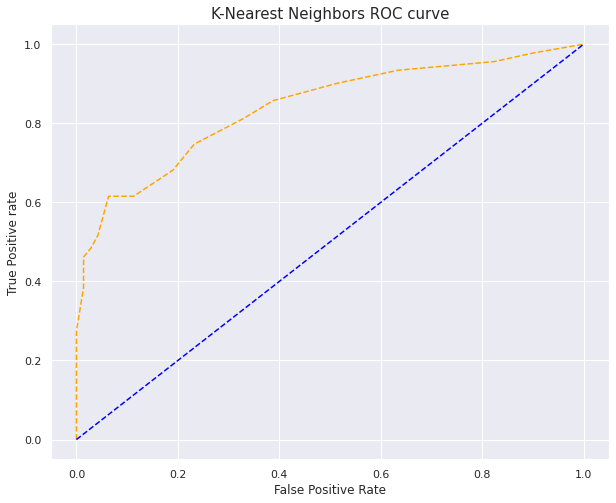

In [51]:
visualize_roc_auc_curve(knn, "K-Nearest Neighbors")

# Model Comparison After Hyperparameter Tuning

In [52]:
tuned_models.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
3,SVC,0.832618
2,GradientBoostingClassifier,0.781116
4,KNeighborsClassifier,0.781116
0,LogisticRegression,0.776824
1,RandomForestClassifier,0.763948


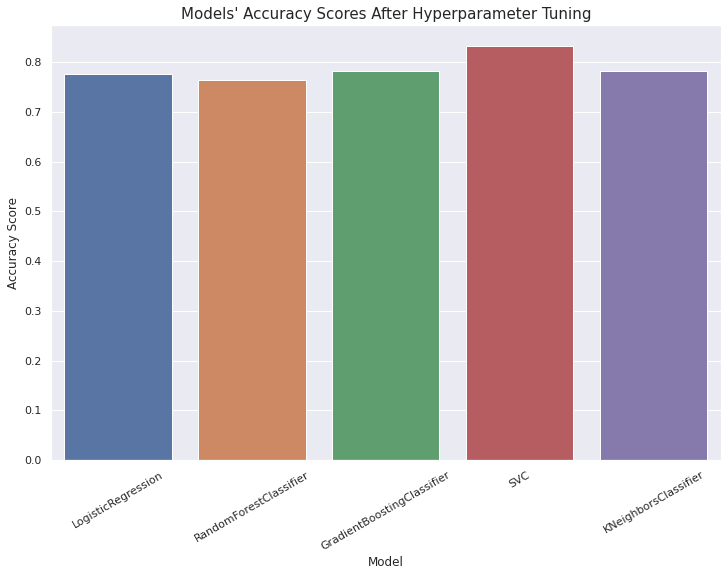

In [53]:
plt.figure(figsize=(12, 8))
sns.barplot(x=tuned_models["Model"], y=tuned_models["Accuracy Score"])
plt.title("Models' Accuracy Scores After Hyperparameter Tuning", size=15)
plt.xticks(rotation=30)
plt.show()

# Conclusion

<h3>After hyperparameter tuning, we can see that the model which is yielding the best accuracy score is Support Vector Machines with the accuracy score of 0.832618.</h3>

<h1 style="font-family: Times New Roman;">Thank you so much for reading notebook. Preparing notebooks is taking a great deal of time. If you liked it, please do not forget to give an upvote. Peace Out ✌️ ...</h1>